In [1]:
import numpy as np
import torch
from matplotlib import pyplot as plt

In [2]:
def gradient_checking(x, func, func_der, h=1e-9):
    
    numerical = (func(x + h) - func(x - h)) / (2 * h)
    
    der = func_der(x)
    dif = numerical - der

    print('Numerical')
    print(numerical)
    print('Your derivative')
    print(der)
    print('Sum difference', dif.sum())

In [3]:
def relu(x):
    return np.maximum(x, 0)


def relu_derivative(x):
    dx = np.array(x, copy=True)
    dx[x <= 0] = 0
    dx[x > 0] = 1
    return dx


def tanh(x):
    exp_scores = np.exp(2 * x)
    return (exp_scores - 1) / (exp_scores + 1)


def tanh_derivative(x):
    return 1 - tanh(x) ** 2


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    x_sigmoid = sigmoid(x)
    return x_sigmoid * (1 - x_sigmoid)

In [4]:
batch_size = 2
embedding_dim = 4

x = np.random.uniform(low=-1., size=(batch_size, embedding_dim))

In [15]:
x

array([[-0.74210758, -0.72681502, -0.30637284,  0.78418654],
       [ 0.96095477,  0.83649419,  0.93459543, -0.79815349]])

In [16]:
relu(x)

array([[0.        , 0.        , 0.        , 0.78418654],
       [0.96095477, 0.83649419, 0.93459543, 0.        ]])

In [5]:
x.shape

(2, 4)

In [6]:
x

array([[-0.74210758, -0.72681502, -0.30637284,  0.78418654],
       [ 0.96095477,  0.83649419,  0.93459543, -0.79815349]])

# Checking activations functions gradients
### Sum difference must be close to zero

In [7]:
print('relu gradient checking')
gradient_checking(x, relu, relu_derivative)

relu gradient checking
Numerical
[[0.         0.         0.         0.99999997]
 [0.99999997 0.99999997 0.99999997 0.        ]]
Your derivative
[[0. 0. 0. 1.]
 [1. 1. 1. 0.]]
Sum difference -1.1312772629779033e-07


In [8]:
print('tanh gradient checking')
gradient_checking(x, tanh, tanh_derivative)

tanh gradient checking
Numerical
[[0.6025746  0.61421868 0.91171157 0.57083988]
 [0.44541826 0.53221555 0.46310783 0.56042682]]
Your derivative
[[0.60257463 0.61421871 0.91171153 0.57083992]
 [0.44541827 0.53221556 0.46310784 0.56042675]]
Sum difference -4.478180154476874e-08


In [9]:
print('sigmoid gradient checking')
gradient_checking(x, sigmoid, sigmoid_derivative)

sigmoid gradient checking
Numerical
[[0.21850916 0.21968713 0.24422409 0.21518726]
 [0.20013136 0.21090429 0.20247304 0.21405966]]
Your derivative
[[0.21850917 0.21968711 0.24422405 0.21518727]
 [0.20013134 0.21090429 0.20247309 0.21405967]]
Sum difference -2.0655788968149125e-08


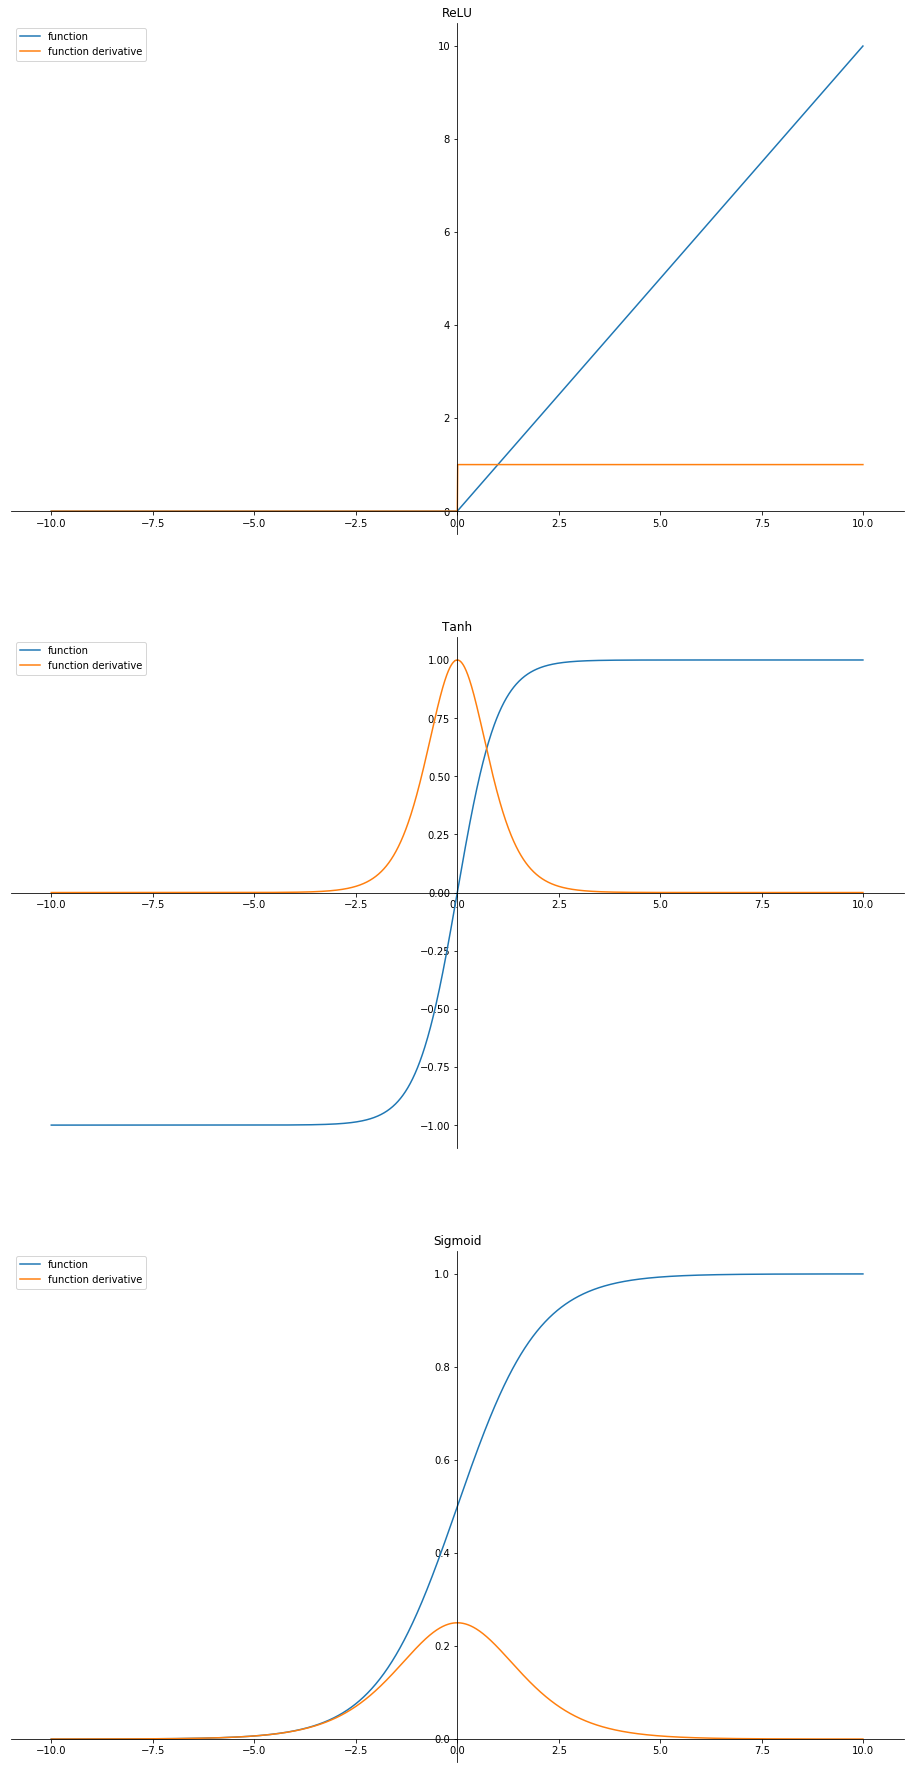

In [14]:
steps = np.arange(-10, 10, step=0.01)

fig, axs = plt.subplots(3, figsize=(16, 32))

axs[0].spines['left'].set_position('center')
axs[0].spines['bottom'].set_position('zero')

axs[0].spines['right'].set_color('none')
axs[0].spines['top'].set_color('none')

axs[0].set_title('ReLU')
axs[0].plot(steps, relu(steps), label='function')
axs[0].plot(steps, relu_derivative(steps), label='function derivative')
    

axs[1].spines['left'].set_position('center')
axs[1].spines['bottom'].set_position('center')

axs[1].spines['right'].set_color('none')
axs[1].spines['top'].set_color('none')

axs[1].set_title('Tanh')
axs[1].plot(steps, tanh(steps), label='function')
axs[1].plot(steps, tanh_derivative(steps), label='function derivative')


axs[2].spines['left'].set_position('center')
axs[2].spines['bottom'].set_position('zero')

axs[2].spines['right'].set_color('none')
axs[2].spines['top'].set_color('none')

axs[2].set_title('Sigmoid')
axs[2].plot(steps, sigmoid(steps), label='function')
axs[2].plot(steps, sigmoid_derivative(steps), label='function derivative')

for ax in axs:
    ax.legend()